In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
results = {
    'platform' : [],
    'average' : [],
    'p50' : [],
    'p90' : []
}

In [20]:
with open('inference-analysis/stable-diffusion/modal-sd-results.json', 'r') as f:
    modal_dict = json.load(f)
    
with open('inference-analysis/stable-diffusion/baseten-sd-results.json', 'r') as f:
    baseten_dict = json.load(f)
      
with open('inference-analysis/stable-diffusion/hf-sd-results.json', 'r') as f:
    hf_dict = json.load(f)
    
with open('inference-analysis/stable-diffusion/runpod-sd-results.json', 'r') as f:
    runpod_dict = json.load(f) 
    
with open('inference-analysis/stable-diffusion/replicate-sd-results.json', 'r') as f:
    replicate_dict = json.load(f) 

In [21]:
runpod_dict.keys()

dict_keys(['runpod'])

In [22]:
all_plats = {}

for plat_dicts in [modal_dict, baseten_dict, hf_dict, runpod_dict, replicate_dict]:
    for key, value in plat_dicts.items():
        print(key, len(value))
        all_plats[key] = value

modal 50
baseten 50
hf 50
runpod 50
replicate 31


In [23]:
all_plats.keys()

dict_keys(['modal', 'baseten', 'hf', 'runpod', 'replicate'])

In [24]:
#GET AVERAGE, MEDIAN AND P90 FOR EACH PLATFORM

results = {
    'platform' : [],
    'average' : [],
    'p50' : [],
    'p90' : []
}

for plat, values in all_plats.items():
    results['platform'].append(plat)
    results['average'].append(np.mean(values))
    results['p50'].append(np.percentile(values, 50))
    results['p90'].append(np.percentile(values, 90))

In [25]:
df = pd.DataFrame(results)
df

,platform,average,p50,p90
0,modal,10.046445,8.878691,13.851137
1,baseten,3.556596,3.552807,3.624724
2,hf,20.395515,20.347229,20.520732
3,runpod,30.360857,30.326202,30.540648
4,replicate,20.707645,20.579949,20.692763


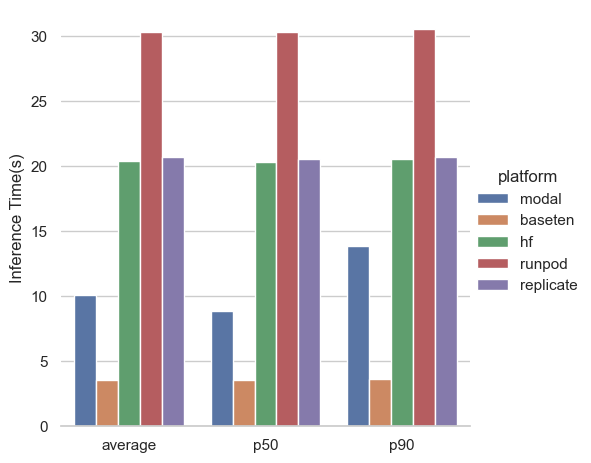

In [27]:
tdf = pd.melt(df, id_vars="platform", var_name="metric", value_name='value')
tdf

sns.set_theme(style="whitegrid")
ax = sns.catplot(
    data=tdf,
    kind="bar",
    x="metric",
    y="value",
    hue="platform"
)
ax.despine(left=True)
ax.set_axis_labels("", "Inference Time(s)")
plt.show()

### Average Inference Time

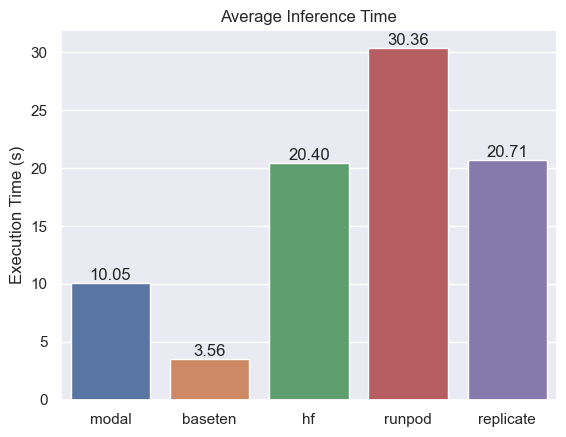

In [26]:
ax = sns.barplot(
    data=df,
    x="platform",
    y="average"
)

for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')


plt.ylabel('Execution Time (s)')
plt.xlabel('')
plt.title('Average Inference Time')

plt.show()